In [1]:
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))

In [2]:
dfa = pd.read_pickle('../../data/Index Constituents/universe3_with_char.pkl')

In [3]:
dfa = dfa.reset_index()
dfa['date'] = pd.to_datetime(dfa['date'])
dfa= dfa.set_index(['ticker','date'])
test = dfa[['R.3000','R.1000','SP50']]
df=dfa.join(test['R.1000'].unstack(0).apply(lambda x: x > x.shift()).astype(int).stack().rename('R.1000'),rsuffix = '_c_flag',how='left')
df=df.join(test['R.1000'].unstack(0).apply(lambda x: x < x.shift()).astype(int).stack().rename('R.1000'),rsuffix = '_d_flag',how='left')
df

,,R.1000,R.3000,SP50,market_val,tret_1mf,tret_3mf,tret_12mf,tret_36mf,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.1000_c_flag,R.1000_d_flag
ticker,date,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,1.0,0.0,329.337006,3.38541,-0.958329,108.66400,89.6042,9.144028,2.395833,10.288486,0.991746,9.902617,-26.942434,0,0
MCS,1999-12-31,0.0,1.0,0.0,389.564643,-16.80000,-3.311630,4.89303,10.5860,-13.648150,1.637209,15.476572,0.664243,10.657537,-12.963236,0,0
CTAS,1999-12-31,1.0,1.0,0.0,5804.504717,-11.82350,11.174100,50.70350,31.0306,0.626259,0.414118,3.632066,0.923622,21.353880,-35.409958,0,0
HAR,1999-12-31,0.0,1.0,0.0,983.933950,4.00891,6.993320,30.42320,113.0960,11.586454,0.356347,17.334110,0.292474,20.464317,44.526463,0,0
BANF,1999-12-31,0.0,1.0,0.0,272.540262,-16.75870,-21.443800,18.88770,44.9134,8.853490,1.709024,13.144922,0.914576,17.106012,-0.888973,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,0.0,1.0,0.0,298.151006,14.34600,-15.330500,-67.08860,-97.2046,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,0,0
ABEO,2019-12-31,0.0,1.0,0.0,267.833866,-33.63910,-35.779800,-51.98780,-96.2324,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,0,0
ADEA,2019-12-31,0.0,1.0,0.0,918.429192,-13.02700,-23.729700,15.67570,19.3036,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,0,0


In [4]:
df = df.join(df['R.1000_c_flag'].unstack(0).shift(-12).stack().rename('R.1000'),how = 'left',rsuffix='_c_l_flag')
df = df.join(df['R.1000_d_flag'].unstack(0).shift(-12).stack().rename('R.1000'),how = 'left',rsuffix='_d_l_flag')
df

,,R.1000,R.3000,SP50,market_val,tret_1mf,tret_3mf,tret_12mf,tret_36mf,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.1000_c_flag,R.1000_d_flag,R.1000_c_l_flag,R.1000_d_l_flag
ticker,date,,,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,1.0,0.0,329.337006,3.38541,-0.958329,108.66400,89.6042,9.144028,2.395833,10.288486,0.991746,9.902617,-26.942434,0,0,0.0,0.0
MCS,1999-12-31,0.0,1.0,0.0,389.564643,-16.80000,-3.311630,4.89303,10.5860,-13.648150,1.637209,15.476572,0.664243,10.657537,-12.963236,0,0,0.0,0.0
CTAS,1999-12-31,1.0,1.0,0.0,5804.504717,-11.82350,11.174100,50.70350,31.0306,0.626259,0.414118,3.632066,0.923622,21.353880,-35.409958,0,0,0.0,0.0
HAR,1999-12-31,0.0,1.0,0.0,983.933950,4.00891,6.993320,30.42320,113.0960,11.586454,0.356347,17.334110,0.292474,20.464317,44.526463,0,0,0.0,0.0
BANF,1999-12-31,0.0,1.0,0.0,272.540262,-16.75870,-21.443800,18.88770,44.9134,8.853490,1.709024,13.144922,0.914576,17.106012,-0.888973,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,0.0,1.0,0.0,298.151006,14.34600,-15.330500,-67.08860,-97.2046,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,0,0,NaN,NaN
ABEO,2019-12-31,0.0,1.0,0.0,267.833866,-33.63910,-35.779800,-51.98780,-96.2324,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,0,0,NaN,NaN
ADEA,2019-12-31,0.0,1.0,0.0,918.429192,-13.02700,-23.729700,15.67570,19.3036,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,0,0,NaN,NaN


In [5]:
df = df.dropna()
df = df.drop(columns =['R.3000','tret_1mf','tret_3mf','tret_12mf','tret_36mf','R.1000_c_flag','R.1000_d_flag','R.1000','SP50'])
df['market_val'] = df['market_val'].unstack().rank(method='min',ascending= False).stack()
df = df[df['market_val']<2000]
df.iloc[:,1:-2] = df.iloc[:,1:-2].fillna(df.iloc[:,1:-1].mean())
df

,,market_val,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.1000_c_l_flag,R.1000_d_l_flag
ticker,date,,,,,,,,,
CORSQ,1999-12-31,1669.0,9.144028,2.395833,10.288486,0.991746,9.902617,-26.942434,0.0,0.0
MCS,1999-12-31,1565.0,-13.648150,1.637209,15.476572,0.664243,10.657537,-12.963236,0.0,0.0
CTAS,1999-12-31,325.0,0.626259,0.414118,3.632066,0.923622,21.353880,-35.409958,0.0,0.0
HAR,1999-12-31,993.0,11.586454,0.356347,17.334110,0.292474,20.464317,44.526463,0.0,0.0
BANF,1999-12-31,1774.0,8.853490,1.709024,13.144922,0.914576,17.106012,-0.888973,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
DHC,2018-12-31,986.0,9.962288,13.310580,13.316524,0.490039,5.710306,-23.731600,0.0,0.0
DCOM,2018-12-31,1877.0,9.029767,3.609259,9.967928,0.737806,9.563028,-23.111197,0.0,0.0
EMWPF,2018-12-31,1793.0,13.328004,0.000000,13.528602,0.003823,8.472469,-7.440643,0.0,0.0


In [6]:
from scipy import stats

df.iloc[:,1:-2] = df.iloc[:,1:-2].apply(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))

In [7]:
df.iloc[:,1:-2] = df.iloc[:,1:-2].apply(stats.zscore)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Specify target variable name
target = 'R.1000_c_l_flag'
df_r = df.drop(columns = ['R.1000_d_l_flag'])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_r.drop(target, 1), 
    df_r[target], 
    test_size=0.2, 
    random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Checking the accuracy of the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf.predict(X_test)

# Checking the accuracy of the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_25900\645398099.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.9978033747158594
Random Forest Accuracy:  0.9978033747158594


C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_25900\1808107318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()


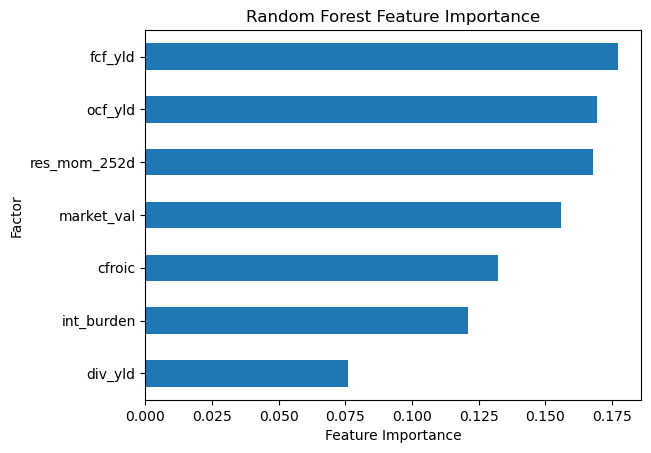

In [9]:
rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()

rf_s.plot(kind ='barh')

plt.title('Random Forest Feature Importance')

plt.xlabel('Feature Importance')

plt.ylabel('Factor')

plt.show()

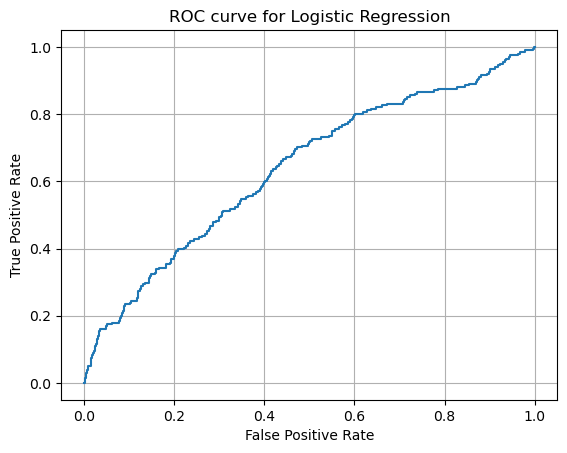

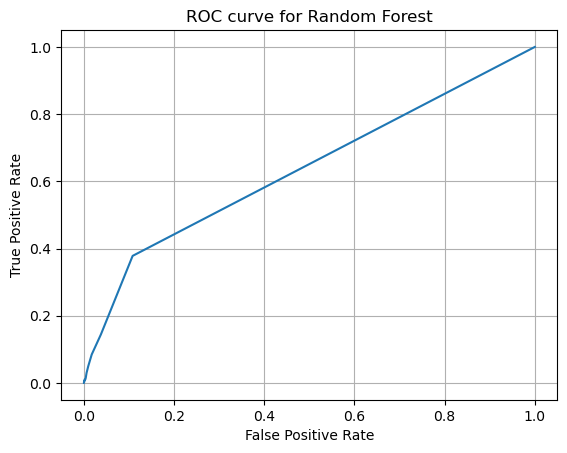

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities with the logistic regression model
lr_probs = logreg.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# Compute predicted probabilities with the RandomForest model
rf_probs = rf.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [11]:
# Compute AUC score
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic Regression AUC Score: ', lr_auc)
print('Random Forest AUC Score: ', rf_auc)

Logistic Regression AUC Score:  0.6378844199427165
Random Forest AUC Score:  0.6361161292101425


In [12]:
# Define training and testing split
X = df_r.drop(target, 1).unstack().ffill().stack().dropna()
rfp = rf.predict(X)
df_rfp_r  =pd.DataFrame(pd.Series(rfp,index = X.index)).rename(columns={0:'rfp_r'})
df_rfp_r


C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_25900\3105190613.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


rfp_r
ticker date             
CORSQ  1999-12-31    0.0
       2000-01-31    0.0
       2000-02-29    0.0
       2000-03-31    0.0
       2000-04-28    0.0
...                  ...
AVYAQ  2018-08-31    0.0
       2018-09-28    0.0
       2018-10-31    0.0
       2018-11-30    0.0
       2018-12-31    0.0

[1173715 rows x 1 columns]

In [13]:
df_final = dfa.join(df_rfp_r,how='left')
df_final

,,R.1000,R.3000,SP50,market_val,tret_1mf,tret_3mf,tret_12mf,tret_36mf,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,rfp_r
ticker,date,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,1.0,0.0,329.337006,3.38541,-0.958329,108.66400,89.6042,9.144028,2.395833,10.288486,0.991746,9.902617,-26.942434,0.0
MCS,1999-12-31,0.0,1.0,0.0,389.564643,-16.80000,-3.311630,4.89303,10.5860,-13.648150,1.637209,15.476572,0.664243,10.657537,-12.963236,0.0
CTAS,1999-12-31,1.0,1.0,0.0,5804.504717,-11.82350,11.174100,50.70350,31.0306,0.626259,0.414118,3.632066,0.923622,21.353880,-35.409958,0.0
HAR,1999-12-31,0.0,1.0,0.0,983.933950,4.00891,6.993320,30.42320,113.0960,11.586454,0.356347,17.334110,0.292474,20.464317,44.526463,0.0
BANF,1999-12-31,0.0,1.0,0.0,272.540262,-16.75870,-21.443800,18.88770,44.9134,8.853490,1.709024,13.144922,0.914576,17.106012,-0.888973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,0.0,1.0,0.0,298.151006,14.34600,-15.330500,-67.08860,-97.2046,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,NaN
ABEO,2019-12-31,0.0,1.0,0.0,267.833866,-33.63910,-35.779800,-51.98780,-96.2324,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,NaN
ADEA,2019-12-31,0.0,1.0,0.0,918.429192,-13.02700,-23.729700,15.67570,19.3036,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,NaN


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Specify target variable name
target = 'R.1000_c_l_flag'
df_r = df.drop(columns = ['R.1000_d_l_flag'])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_r.drop(target, 1), 
    df_r[target], 
    test_size=0.2, 
    random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Checking the accuracy of the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf.predict(X_test)

# Checking the accuracy of the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_25900\645398099.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.9978033747158594
Random Forest Accuracy:  0.9978033747158594


C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_25900\1808107318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()


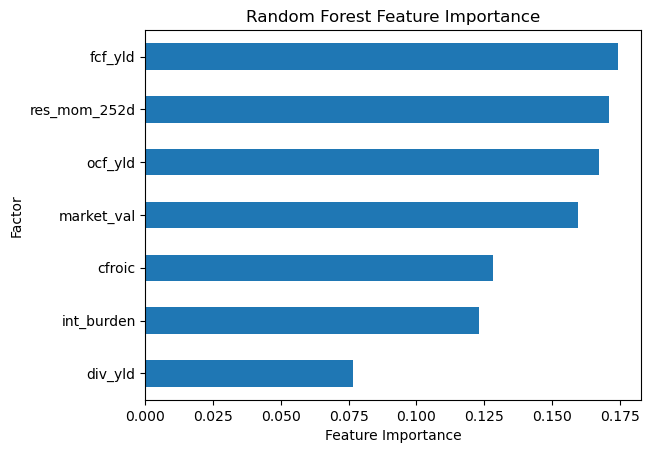

In [15]:
rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()

rf_s.plot(kind ='barh')

plt.title('Random Forest Feature Importance')

plt.xlabel('Feature Importance')

plt.ylabel('Factor')

plt.show()

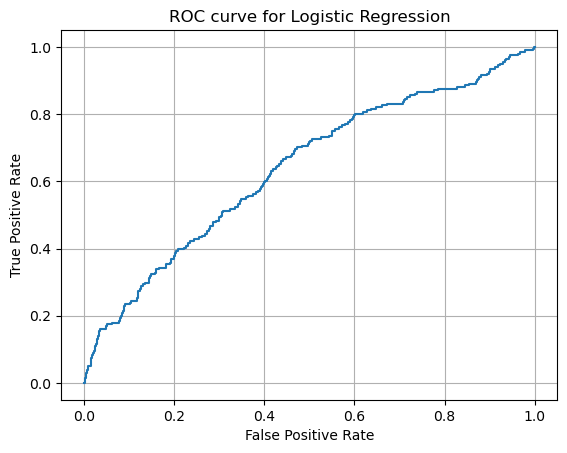

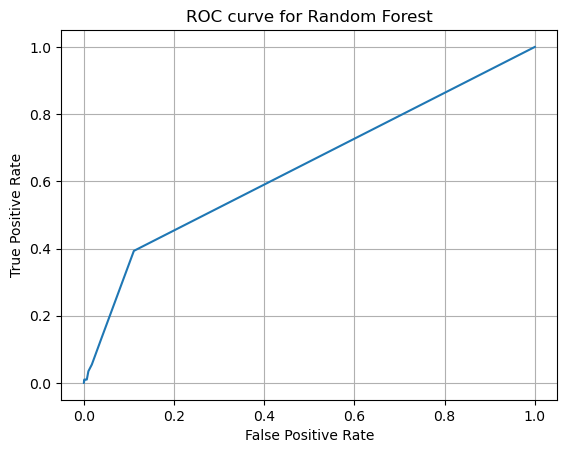

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities with the logistic regression model
lr_probs = logreg.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# Compute predicted probabilities with the RandomForest model
rf_probs = rf.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [17]:
# Compute AUC score
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic Regression AUC Score: ', lr_auc)
print('Random Forest AUC Score: ', rf_auc)

Logistic Regression AUC Score:  0.6378844199427165
Random Forest AUC Score:  0.6407747196571385


In [18]:
# Define training and testing split
X = df_r.drop(target, 1).unstack().ffill().stack().dropna()
rfp = rf.predict(X)
df_rfp_r  =pd.DataFrame(pd.Series(rfp,index = X.index)).rename(columns={0:'rfp_d'})
df_final = df_final.join(df_rfp_r,how='left')
df_final

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_25900\3055834145.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


,,R.1000,R.3000,SP50,market_val,tret_1mf,tret_3mf,tret_12mf,tret_36mf,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,rfp_r,rfp_d
ticker,date,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,1.0,0.0,329.337006,3.38541,-0.958329,108.66400,89.6042,9.144028,2.395833,10.288486,0.991746,9.902617,-26.942434,0.0,0.0
MCS,1999-12-31,0.0,1.0,0.0,389.564643,-16.80000,-3.311630,4.89303,10.5860,-13.648150,1.637209,15.476572,0.664243,10.657537,-12.963236,0.0,0.0
CTAS,1999-12-31,1.0,1.0,0.0,5804.504717,-11.82350,11.174100,50.70350,31.0306,0.626259,0.414118,3.632066,0.923622,21.353880,-35.409958,0.0,0.0
HAR,1999-12-31,0.0,1.0,0.0,983.933950,4.00891,6.993320,30.42320,113.0960,11.586454,0.356347,17.334110,0.292474,20.464317,44.526463,0.0,0.0
BANF,1999-12-31,0.0,1.0,0.0,272.540262,-16.75870,-21.443800,18.88770,44.9134,8.853490,1.709024,13.144922,0.914576,17.106012,-0.888973,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,0.0,1.0,0.0,298.151006,14.34600,-15.330500,-67.08860,-97.2046,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,NaN,NaN
ABEO,2019-12-31,0.0,1.0,0.0,267.833866,-33.63910,-35.779800,-51.98780,-96.2324,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,NaN,NaN
ADEA,2019-12-31,0.0,1.0,0.0,918.429192,-13.02700,-23.729700,15.67570,19.3036,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,NaN,NaN


In [19]:
df_final.to_pickle('../../data/Index Constituents/predictions.pkl')

In [20]:
df_trim = df_final[['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf','rfp_r','rfp_d']].dropna()

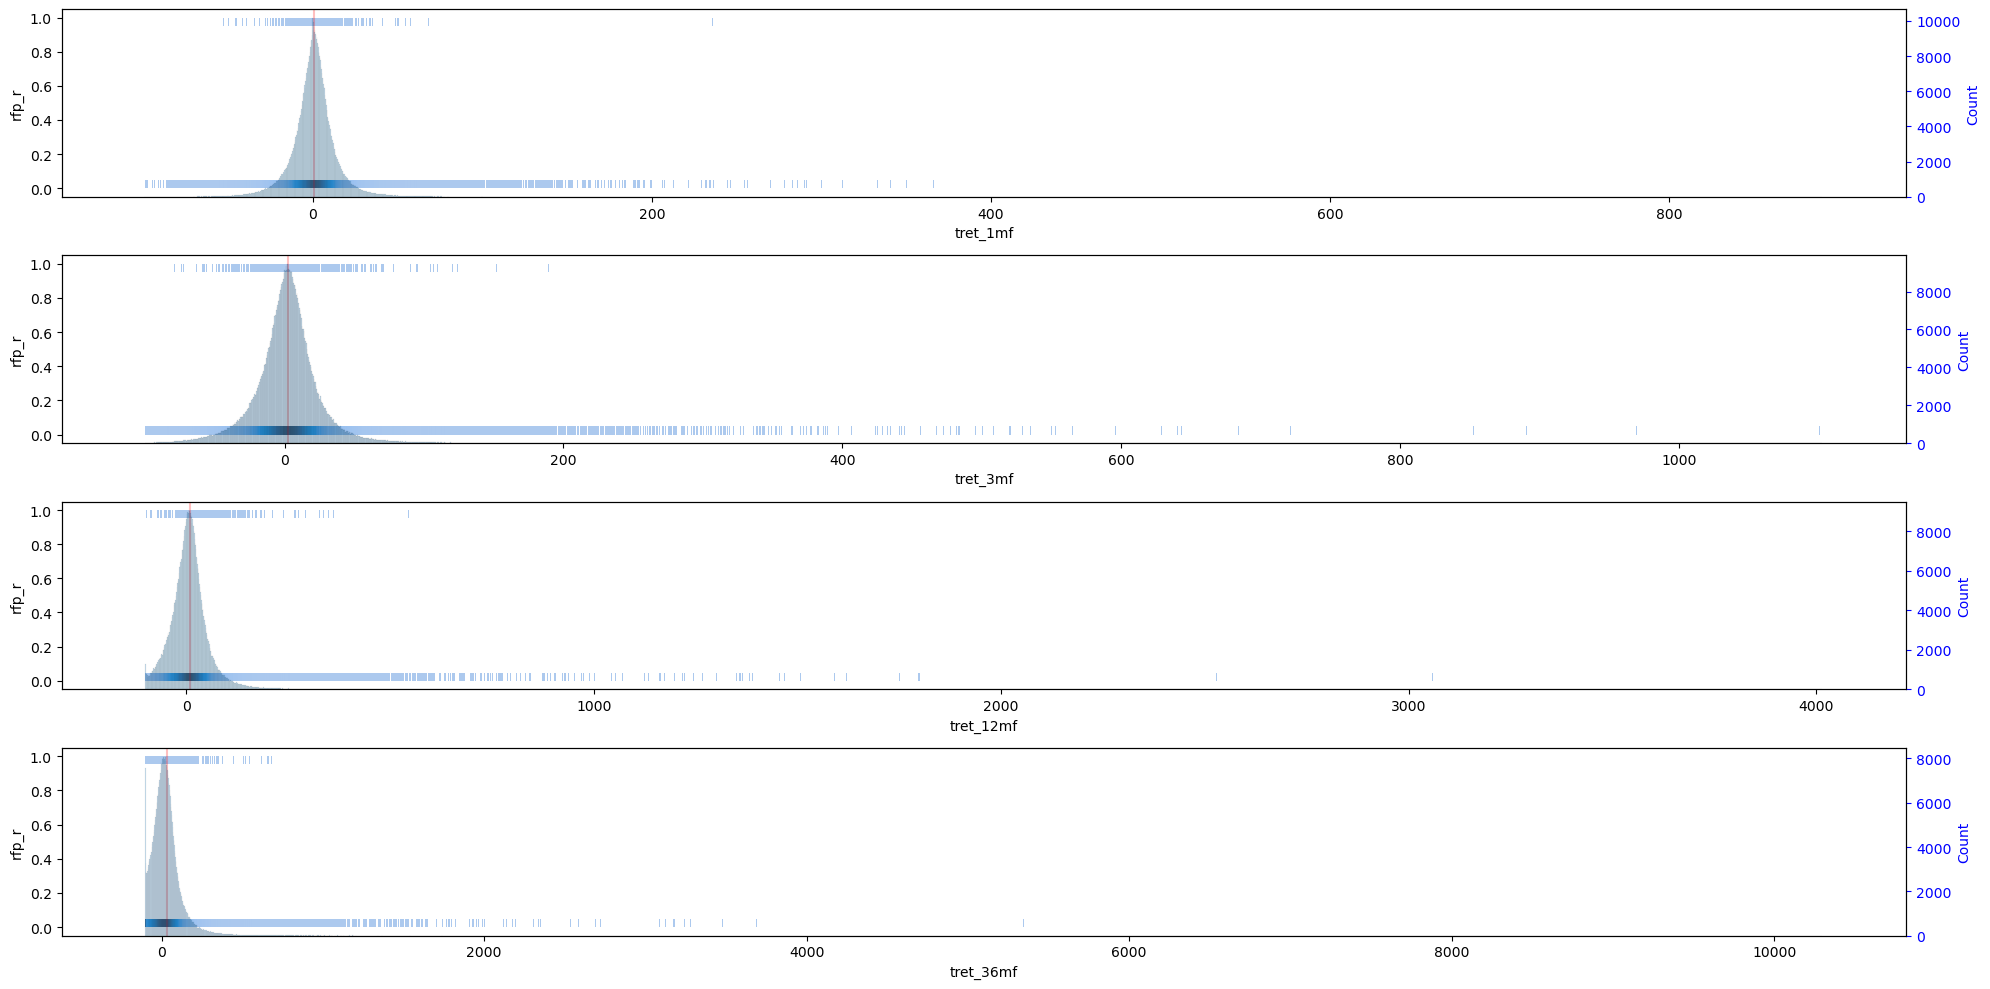

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(20, 10))

for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
    # first histogram plot
    sns.histplot(data=df_trim, x=str(col[1]), ax=axs[col[0]],y='rfp_r')
    axs[col[0]].axvline(df_final[col[1]].mean(), color='red', label='Mean', alpha=.25)

    # create a twin Axes sharing the x-axis
    ax2 = axs[col[0]].twinx()

    # Set the xlim for secondary axis to match with the first.
    ax2.set_xlim(axs[col[0]].get_xlim())

    # second histogram plot with separate scale
    sns.histplot(data=df_final, x=col[1], ax=ax2, alpha=.25)

    # Make the y-axis label, ticks and tick labels match the line color.
    ax2.tick_params(axis='y', colors='blue')
    ax2.yaxis.label.set_color('blue')

plt.tight_layout()

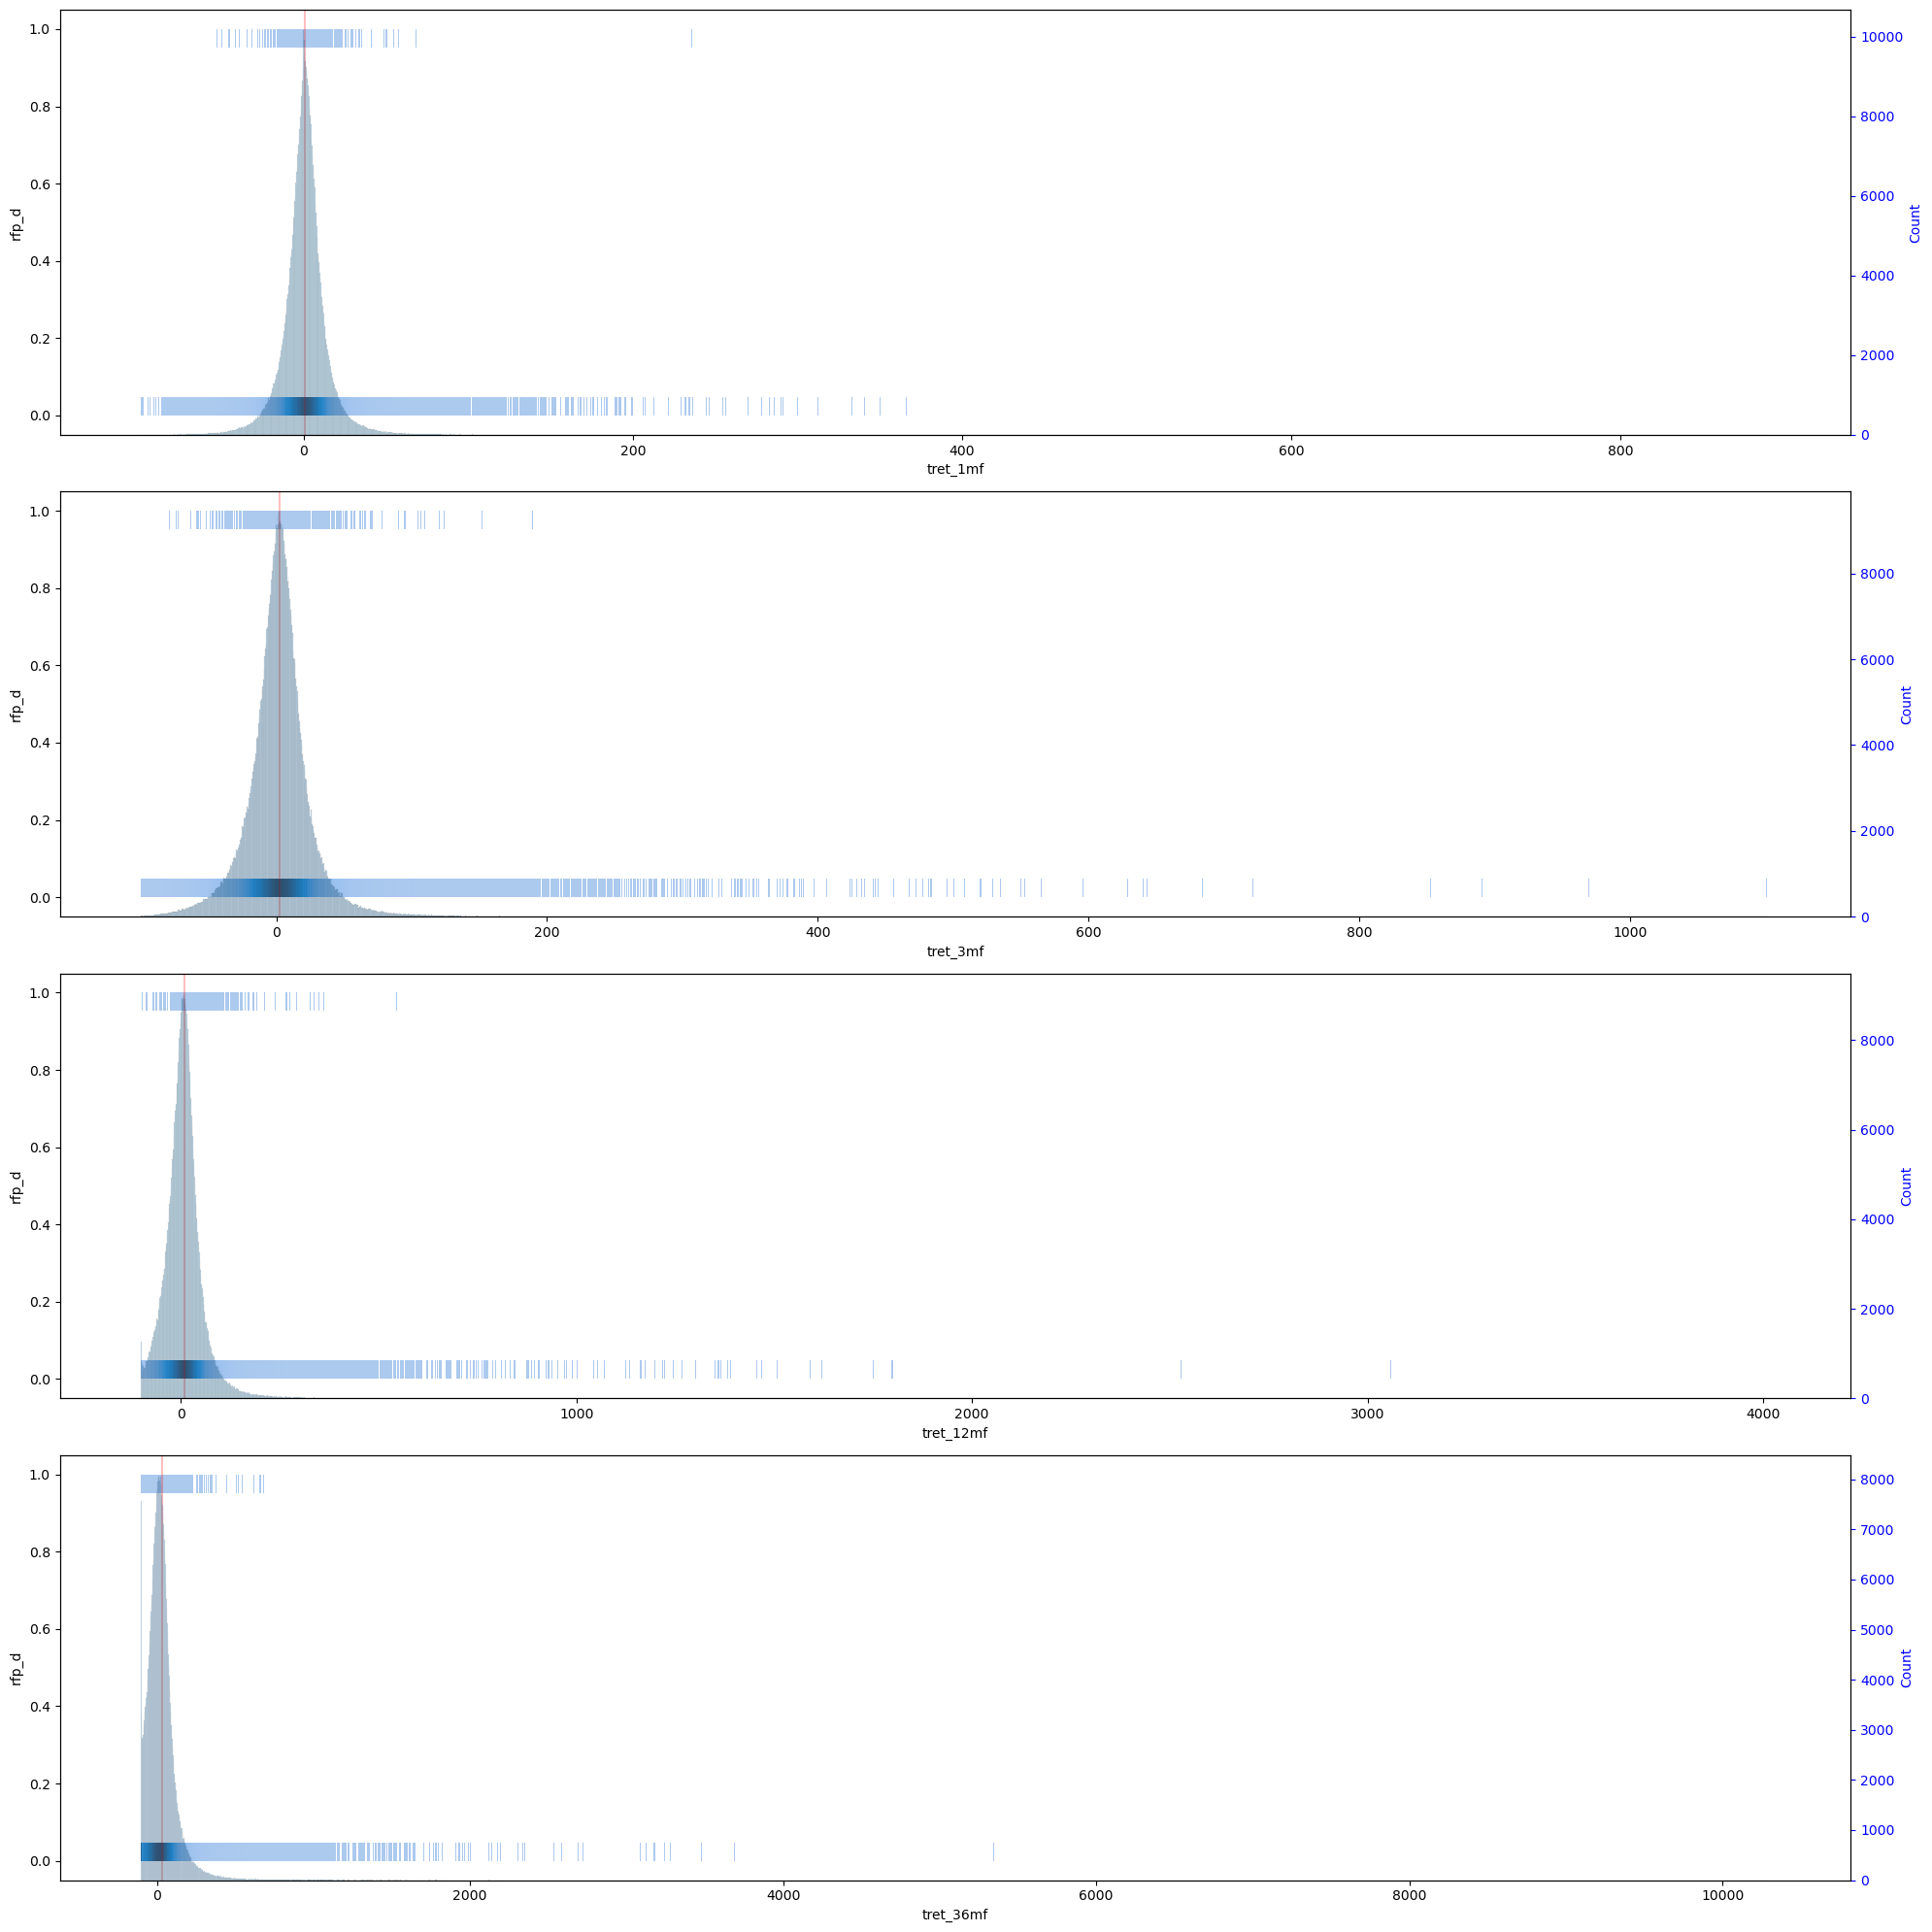

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(20, 20))

for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
    # first histogram plot
    sns.histplot(data=df_trim, x=str(col[1]), ax=axs[col[0]],y='rfp_d')
    axs[col[0]].axvline(df_final[col[1]].mean(), color='red', label='Mean', alpha=.25)

    # create a twin Axes sharing the x-axis
    ax2 = axs[col[0]].twinx()

    # Set the xlim for secondary axis to match with the first.
    ax2.set_xlim(axs[col[0]].get_xlim())

    # second histogram plot with separate scale
    sns.histplot(data=df_final, x=col[1], ax=ax2, alpha=.25)

    # Make the y-axis label, ticks and tick labels match the line color.
    ax2.tick_params(axis='y', colors='blue')
    ax2.yaxis.label.set_color('blue')

plt.tight_layout()